In [37]:
import numpy as np
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
from keras.models import Sequential
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Procedure

1. Look at data
2. Split for cross validation
3. Make model
4. Train model
5. Test model
6. Evaluate
Stop training before overfiting


Raw shape: (1000,)


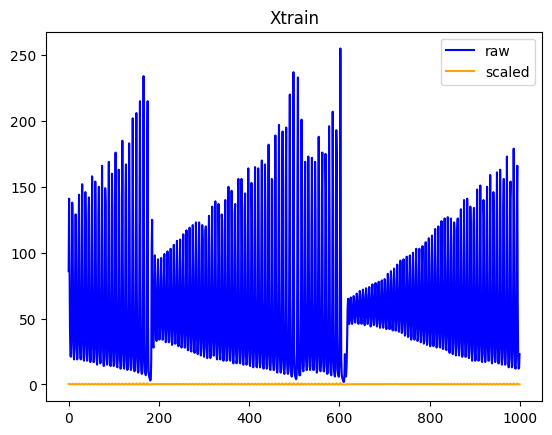

In [ ]:
# Load and Normalize Data
data = loadmat("Xtrain.mat")
x_raw = data["Xtrain"].flatten()
print("Raw shape:", x_raw.shape)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_raw.reshape(-1, 1)).flatten()

plt.plot(x_raw, label="raw", c="blue")
plt.plot(X_scaled, label="scaled", c="orange")
plt.title("Xtrain")
plt.legend()
plt.show()

In [ ]:
# Create Input Sequences
input_len = 20
val_ratio = 0.2

def create_sequences(data, input_len):
    X, y = [], []
    for i in range(len(data) - input_len):
        X.append(data[i:i + input_len])
        y.append(data[i + input_len])
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(X_scaled, input_len)
X_seq = X_seq[..., np.newaxis]  # Shape: (samples, input_len, 1)

print("Input shape:", X_seq.shape)
print("Output shape:", y_seq.shape)

Input shape: (980, 20, 1)
Output shape: (980,)


In [ ]:
# Train/Val Split 
split = int(len(X_seq) * (1 - val_ratio))
X_train, X_val = X_seq[:split], X_seq[split:]
y_train, y_val = y_seq[:split], y_seq[split:]


In [ ]:
# Build Model
model = Sequential([
    Conv1D(filters=4, kernel_size=5, activation='relu', input_shape=(input_len, 1)),
    MaxPooling1D(),
    Conv1D(filters=4, kernel_size=5, activation='relu'),
    MaxPooling1D(),
    Flatten(),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/Users/aukevanderkuil/Documents/2. Study & Research/3. Master AI/8. Deep Learning/Assignement 1/infodlr1/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_52 (Conv1D)              │ (None, 16, 4)          │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_27 (MaxPooling1D) │ (None, 8, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_53 (Conv1D)              │ (None, 4, 4)           │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_28 (MaxPooling1D) │ (None, 2, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117 (468.00 B)

 Trainable params: 117 (468.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train Model
model.fit(X_train, y_train, epochs=25, batch_size=2, validation_data=(X_val, y_val))

Epoch 1/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0465 - mae: 0.1485 - val_loss: 0.0101 - val_mae: 0.0740
Epoch 2/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0166 - mae: 0.0846 - val_loss: 0.0076 - val_mae: 0.0676
Epoch 3/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0184 - mae: 0.0905 - val_loss: 0.0076 - val_mae: 0.0638
Epoch 4/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0127 - mae: 0.0745 - val_loss: 0.0054 - val_mae: 0.0570
Epoch 5/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0109 - mae: 0.0678 - val_loss: 0.0044 - val_mae: 0.0511
Epoch 6/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0111 - mae: 0.0725 - val_loss: 0.0047 - val_mae: 0.0508
Epoch 7/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0120 - mae: 0.0700 - val_loss: 0.0040 - val_mae: 0.0474
Epoch 8/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0095 - mae: 0.0629 - val_loss: 0.0043 - val_mae: 0.0487
Epoch 9/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - lo

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Actual	Predicted
0.3597	0.2698
0.4387	0.4372
0.2885	0.3615
0.1502	0.1263
0.1067	0.0973
0.1107	0.1015
0.1858	0.2022
0.3557	0.2674
0.4585	0.4408
0.3004	0.3688


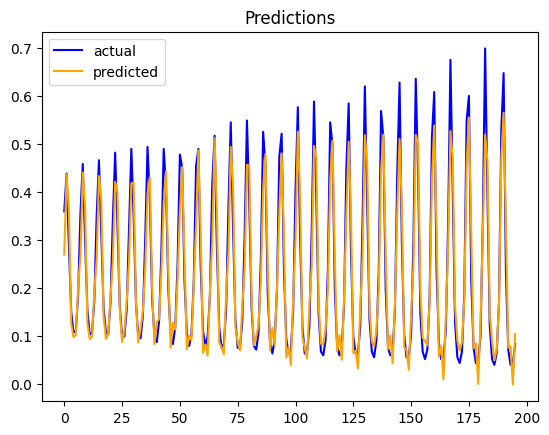

/var/folders/x5/cw26n8bs4m93n5kwj3bdrz_c0000gn/T/ipykernel_74021/2818001787.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


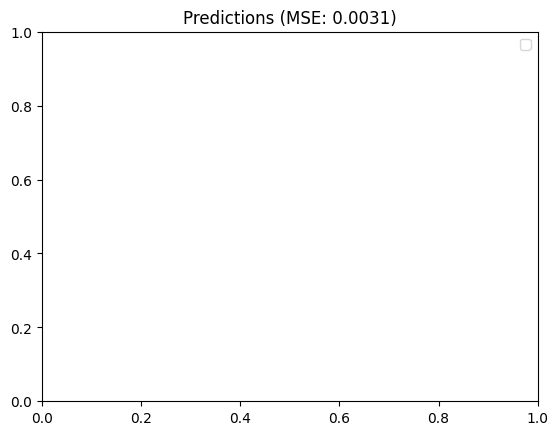

MSE: 0.0031


In [ ]:
# Evaluate
pred = model.predict(X_val)

print("\nActual\tPredicted")
for actual, predicted in zip(y_val[:10], pred[:10]):
    print(f"{actual:.4f}\t{predicted[0]:.4f}")
# Plot Predictions
plt.plot(y_val, label="actual", c="blue")
plt.plot(pred, label="predicted", c="orange")
plt.title("Predictions")
plt.legend()
plt.show()
# show MSE in the plot and console
plt.title(f"Predictions (MSE: {mean_squared_error(y_val, pred):.4f})")
plt.legend()
plt.show()
# Calculate MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, pred)
print(f"MSE: {mse:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


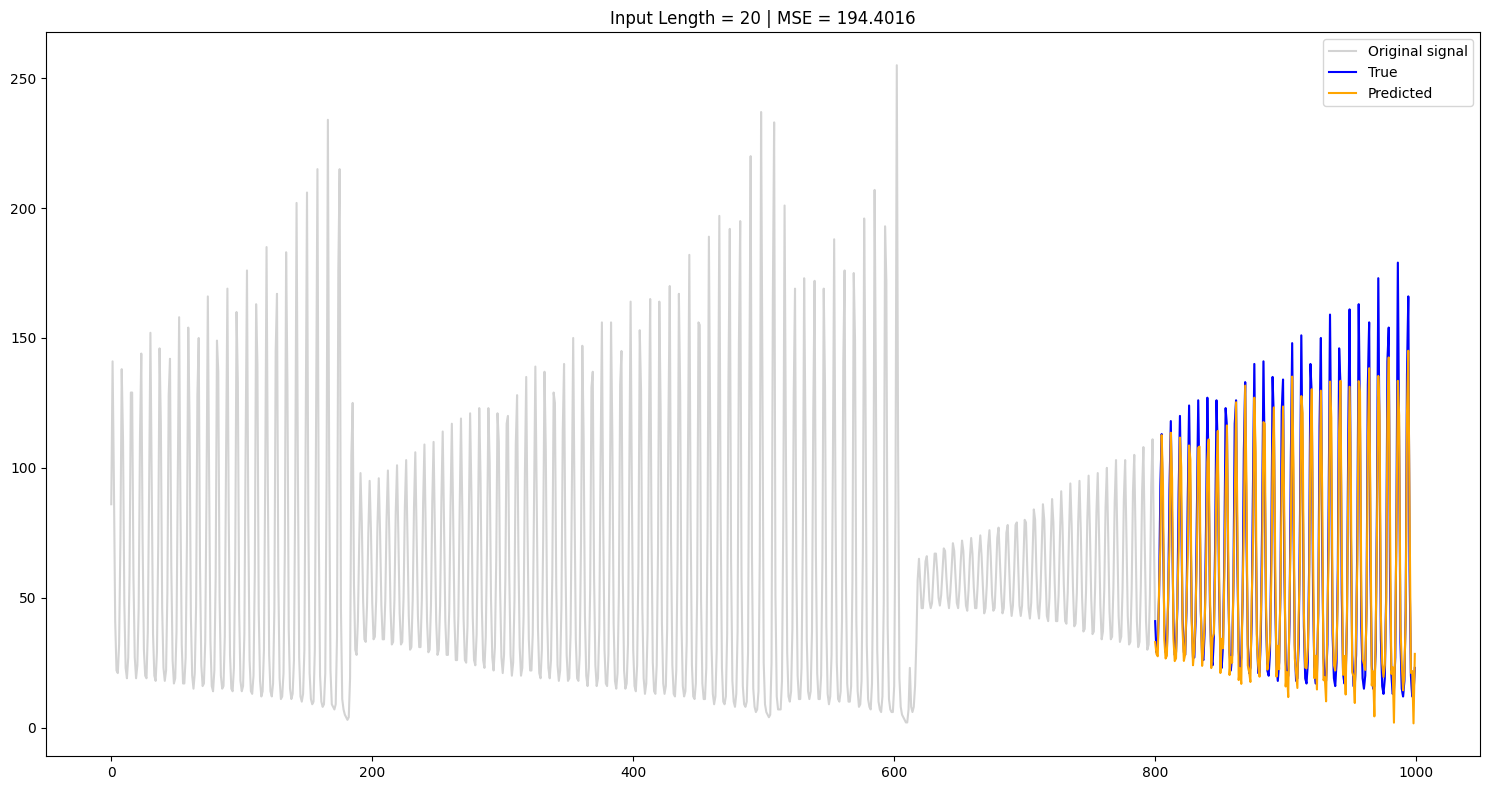

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def evaluate_predictions_on_raw(x_raw, X_scaled, scaler, model, input_lens, cutoff_ratio=0.8):
    """
    Show predictions starting from a cutoff on the original raw signal, for multiple input lengths.
    """
    total_len = len(X_scaled)
    cutoff_idx = int(total_len * cutoff_ratio)
    
    plt.figure(figsize=(15, 8))
    for i, input_len in enumerate(input_lens):
        # Create fresh sequences for each input length
        X_seq, y_seq = create_sequences(X_scaled, input_len)
        X_seq = X_seq[..., np.newaxis]

        # Predict from cutoff point onward
        start = cutoff_idx - input_len  # So the first prediction starts at cutoff
        end = len(X_seq)
        X_pred_seq = X_seq[start:end]
        y_true_seq = y_seq[start:end]
        y_pred_seq = model.predict(X_pred_seq).flatten()

        # Inverse transform for plotting in raw scale
        y_true_raw = scaler.inverse_transform(y_true_seq.reshape(-1, 1)).flatten()
        y_pred_raw = scaler.inverse_transform(y_pred_seq.reshape(-1, 1)).flatten()

        # Time axis in raw scale
        time = np.arange(input_len + start, input_len + start + len(y_true_seq))

        # Plot
        plt.subplot(len(input_lens), 1, i + 1)
        plt.plot(x_raw, color='lightgray', label="Original signal")
        plt.plot(time, y_true_raw, label="True", color='blue')
        plt.plot(time, y_pred_raw, label="Predicted", color='orange')
        mse = mean_squared_error(y_true_raw, y_pred_raw)
        plt.title(f"Input Length = {input_len} | MSE = {mse:.4f}")
        plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
evaluate_predictions_on_raw(x_raw, X_scaled, scaler, model, input_lens=[20])


In [51]:
pip install altair pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Create Input Sequences
input_len = 20
val_ratio = 0.2

def create_sequences(data, input_len):
    X, y = [], []
    for i in range(len(data) - input_len):
        X.append(data[i:i + input_len])
        y.append(data[i + input_len])
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(X_scaled, input_len)
X_seq = X_seq[..., np.newaxis]  # Shape: (samples, input_len, 1)

print("Input shape:", X_seq.shape)
print("Output shape:", y_seq.shape)

Input shape: (980, 20, 1)
Output shape: (980,)


In [55]:
import pandas as pd
import altair as alt
import numpy as np

def make_zoomable_draggable_mse_inspector(x_raw, X_scaled, scaler, model, input_len):
    # Predict
    X_seq, y_seq = create_sequences(X_scaled, input_len)
    X_seq = X_seq[..., np.newaxis]
    y_pred_seq = model.predict(X_seq).flatten()

    # Inverse transform
    y_true_raw = scaler.inverse_transform(y_seq.reshape(-1, 1)).flatten()
    y_pred_raw = scaler.inverse_transform(y_pred_seq.reshape(-1, 1)).flatten()
    mse_values = (y_true_raw - y_pred_raw) ** 2
    time = np.arange(input_len, len(x_raw))

    df = pd.DataFrame({
        "Time": time,
        "True": y_true_raw,
        "Predicted": y_pred_raw,
        "MSE": mse_values
    })

    # Nearest point selection
    nearest = alt.selection_point(
        name="Select",
        fields=["Time"],
        nearest=True,
        on="mouseover",
        empty="none"
    )

    # Line plot
    lines = alt.Chart(df).transform_fold(
        ['True', 'Predicted'],
        as_=['Type', 'Value']
    ).mark_line().encode(
        x=alt.X('Time:Q', scale=alt.Scale(zero=False)),
        y='Value:Q',
        color='Type:N'
    )

    # Invisible selectors for selection
    selectors = alt.Chart(df).mark_point().encode(
        x='Time:Q',
        opacity=alt.value(0),
    ).add_params(
        nearest
    )

    # Vertical rule at selected point
    rule = alt.Chart(df).mark_rule(color='gray').encode(
        x='Time:Q'
    ).transform_filter(
        nearest
    )

    # MSE label at selected point
    mse_text = alt.Chart(df).mark_text(
        align='left',
        dx=5,
        dy=-80,
        fontSize=14
    ).encode(
        x='Time:Q',
        y='Predicted:Q',
        text=alt.Text('MSE:Q', format=".5f")
    ).transform_filter(
        nearest
    )

    chart = alt.layer(
        lines,
        selectors,
        rule,
        mse_text
    ).properties(
        width=750,
        height=300,
        title="Zoom + Hover to Inspect MSE"
    ).interactive()  # ✅ Enables zoom/pan

    return chart

# Example usage:
make_zoomable_draggable_mse_inspector(x_raw, X_scaled, scaler, model, input_len=20)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


alt.LayerChart(...)